The following is a simulation on M/M/1 queues.

A M/M/1 queue has memoryless arrival and departure processes, with only 1 queue.

The expressions for the evolution of the state (probability distribution of the length of queue) is
$$
    \dot p_k(t) = \begin{cases}
        \lambda p_{k-1}(t) + \mu p_{k+1}(t) - (\lambda + \mu) p_k(t)  & k > 0\\
        \mu p_1(t) - \lambda p_0(t) & k = 0
    \end{cases}
$$
where $p_k(t)$ represents the probability of the queue to have length $k$ at time $t$.

The memoryless process assumes a poisson distribution for both the arrival and departure process.
Specifically, the per time unit arrivals is the random variable $A \sim Po(\lambda)$ and the per time unit departures is $D \sim Po(\mu)$.

This poisson distribution states that the expected per unit arrival and departures are
$$
\begin{align*}
    E[A] &= \lambda\\
    E[D] &= \mu
\end{align*}
$$
with the pdfs - probability that the per time unit arrival is $k$
$$
    P(A = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

[0.40192151 0.27223409 0.16341715 0.08451956 0.03317248 0.        ]


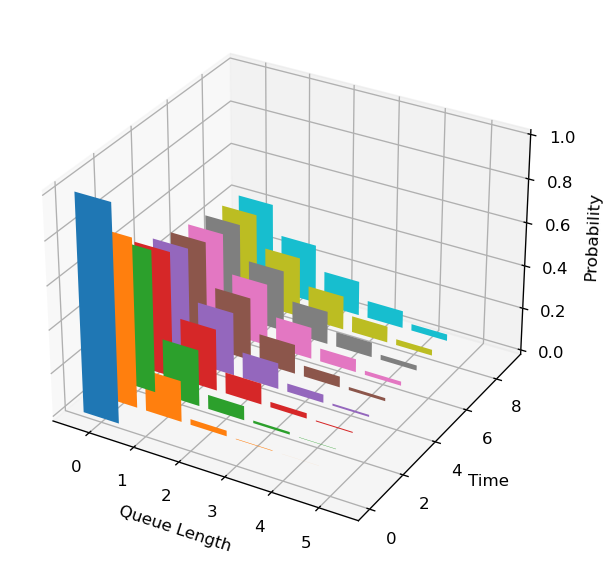

In [23]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_queue_mm1(
        arr_rate: float,
        dep_rate: float
):
    """
    Simulate the probability distribution of the queue length over time, with initial condition being an empty queue
    """

    domain = 6
    ps = np.zeros(domain, dtype=np.float64)
    ps[0] = 1

    dps = np.zeros(domain, dtype=np.float64)

    fig = plt.figure(figsize=(12, 6), dpi=120)
    ax = fig.add_subplot(projection='3d')

    # evolve queue for 10 time units
    T = 10
    h = 0.01
    ts = np.arange(0, T, h)
    xs = np.arange(0, domain)
    for t in ts:
        # compute derivatives
        dps[0] = dep_rate * ps[1] - arr_rate * ps[0]
        for k in range(1, domain-1):
            dps[k] = arr_rate * ps[k-1] + dep_rate * ps[k+1] - (arr_rate + dep_rate) * ps[k]

        # record ps
        if abs(t - int(t)) < h/10:
            ax.bar(xs, ps, zs=t, zdir='y')

        # euler's method
        ps = ps + h * dps

    ax.set_xlabel('Queue Length')
    ax.set_ylabel('Time')
    ax.set_zlabel('Probability')

    print(ps)



simulate_queue_mm1(0.3, 0.4)

In the long term, where
$$
    \dot p_k(t) = 0
$$
we have
$$
    \pi_k = \lim_{t \to \infty} p_k(t)
$$

Then the following probability distribution holds
$$
\begin{align*}
    \pi_0 &= 1 - \frac{\lambda}{\mu}\\
    \pi_k &= \pi_0 \left(\frac{\lambda}{\mu} \right)^k
\end{align*}
$$
with the condition that $\frac{\lambda}{\mu} < 1$. Otherwise the queue will never settle in a stable/invariant state.

This long term distribution is the invariant distribution.


